In [125]:
import os
import sys
import re
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import copy

In [2]:
%load_ext autoreload
%autoreload 2

In [35]:
sys.path.append('../../statmechlib')
from statmechlib.read_write import read_vasp
from statmechlib.preprocessing import Trajectory, get_stats_EAM

In [4]:
target_raw = '../data/target_raw'
target_proc = '../data/target_processed'

datasets = ['bcc_npt_langevin_300K',
            'fcc_npt_langevin_300K',
            'vac_npt_langevin_2000K',
            'i110_npt_langevin_2000K',
            'i111_npt_langevin_2000K',
            'screw_111_npt_langevin_2000K',
            'bcc_npt_langevin_3700K',
            'liq_3700K',
            'liq_5000K']

datasets_0k = ['bcc_0k',
               'fcc_0k',
               'vac_0k',
               'i110_0k',
               'i111_0k',
               'screw_111_0k']

In [5]:
#with open(os.path.join(target_proc,  "datasets.pickle"), 'wb') as fo:
#    pickle.dump(datasets, fo)
#
#print(datasets)

In [6]:
trajdirs = [target_raw + '/' + dataset for dataset in datasets]
trajdirs_0k = [target_raw + '/' + dataset for dataset in datasets_0k]

In [92]:
trajectories = {}
for name, traj_path in zip(datasets, trajdirs):
    trajectories[name] = read_vasp(traj_path)

Reading ../data/target_raw/bcc_npt_langevin_300K/OUTCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/POSCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/CONTCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/XDATCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/OSZICAR
Reading ../data/target_raw/bcc_npt_langevin_300K/INCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/OUTCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/POSCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/CONTCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/XDATCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/OSZICAR
Reading ../data/target_raw/fcc_npt_langevin_300K/INCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/OUTCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/POSCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/CONTCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/XDATCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/OSZICAR
Reading ../data/target_raw/vac_npt_l

In [93]:
trajectories_0k = {}
for name, traj_path in zip(datasets_0k, trajdirs_0k):
    trajectories_0k[name] = read_vasp(traj_path)

Reading ../data/target_raw/bcc_0k/OUTCAR
Reading ../data/target_raw/bcc_0k/POSCAR
Reading ../data/target_raw/bcc_0k/CONTCAR
Reading ../data/target_raw/bcc_0k/XDATCAR
Reading ../data/target_raw/bcc_0k/OSZICAR
Reading ../data/target_raw/bcc_0k/INCAR
Reading ../data/target_raw/fcc_0k/OUTCAR
Reading ../data/target_raw/fcc_0k/POSCAR
Reading ../data/target_raw/fcc_0k/CONTCAR
Reading ../data/target_raw/fcc_0k/OSZICAR
Reading ../data/target_raw/fcc_0k/INCAR
Reading ../data/target_raw/vac_0k/OUTCAR
Reading ../data/target_raw/vac_0k/POSCAR
Reading ../data/target_raw/vac_0k/CONTCAR
Reading ../data/target_raw/vac_0k/OSZICAR
Reading ../data/target_raw/vac_0k/INCAR
Reading ../data/target_raw/i110_0k/OUTCAR
Reading ../data/target_raw/i110_0k/POSCAR
Reading ../data/target_raw/i110_0k/CONTCAR
Reading ../data/target_raw/i110_0k/XDATCAR
Reading ../data/target_raw/i110_0k/OSZICAR
Reading ../data/target_raw/i110_0k/INCAR
Reading ../data/target_raw/i111_0k/OUTCAR
Reading ../data/target_raw/i111_0k/POSCAR
Re

In [97]:
trajectories[datasets[2]].keys(), trajdirs[2], datasets[2]

(dict_keys(['box', 'xyz', 'atom_type', 'energy', 'forces', 'temp', 'free_energy', 'total_energy', 'atom_num', 'ensemble', 'box0', 'xyz0', 'atom_type0', 'atom_name', 'atom_num0']),
 '../data/target_raw/vac_npt_langevin_2000K',
 'vac_npt_langevin_2000K')

In [105]:
# Convert MD trajectory dicts to objects
trjs = {}
for k, trj in trajectories.items():
    trjs[k] = Trajectory(trj, inplace=False)

In [106]:
# Convert MD trajectory 0K configs to objects
trjs_0k = {}
for k, trj in trajectories_0k.items():
    trjs_0k[k] = Trajectory(trj, inplace=False)[-1]

In [132]:
trjs_all = copy.deepcopy(trjs)

In [120]:
trj_big_screw_0k = trjs_0k['screw_111_0k'].replicate(vec_a=1, vec_b=4, vec_c=1)
trj_big_screw = trjs['screw_111_npt_langevin_2000K'].replicate(vec_a=1, vec_b=4, vec_c=1)

In [142]:
traj0k = trjs_0k['bcc_0k']

for k, trj in trjs_0k.items():
    print(k)
    if ('screw' not in k) and ('bcc' not in k):
        traj0k.append(trj)
    print(len())

traj0k.append(trj_big_screw_0k)

bcc_0k
fcc_0k
vac_0k
i110_0k
i111_0k
screw_111_0k


In [140]:
traj0k['box']

[array([[12.748742,  0.      ,  0.      ],
        [ 0.      , 12.748742,  0.      ],
        [ 0.      ,  0.      , 12.748742]]),
 array([[10.85089164,  0.        ,  0.        ],
        [ 0.        , 10.85089164,  0.        ],
        [ 0.        ,  0.        , 10.85089164]]),
 array([[12.73304597,  0.        ,  0.        ],
        [ 0.        , 12.73304597,  0.        ],
        [ 0.        ,  0.        , 12.73304597]]),
 array([[12.6836,  0.    ,  0.    ],
        [ 0.    , 12.6836,  0.    ],
        [ 0.    ,  0.    , 12.6836]]),
 array([[12.6836,  0.    ,  0.    ],
        [ 0.    , 12.6836,  0.    ],
        [ 0.    ,  0.    , 12.6836]]),
 array([[39.07300206,  0.        ,  0.        ],
        [ 0.        , 11.05151387,  0.        ],
        [19.53650103,  1.38143923, 20.30292746]]),
 array([[10.85089164,  0.        ,  0.        ],
        [ 0.        , 10.85089164,  0.        ],
        [ 0.        ,  0.        , 10.85089164]]),
 array([[12.73304597,  0.        ,  0.        ]

In [80]:
trj_end['ensemble']

'npt'

In [82]:
[t['ensemble'] for t in trajectories_0k]

['npt', 'npt', 'npt', 'npt', 'npt', 'npt']

0 [('W', 128)] 1496
1 [('W', 108)] 552
2 [('W', 127)] 1480
3 [('W', 129)] 1461
4 [('W', 129)] 1477
5 [('W', 135)] 1992
6 [('W', 128)] 1329
7 [('W', 113)] 1153
8 [('W', 113)] 1406


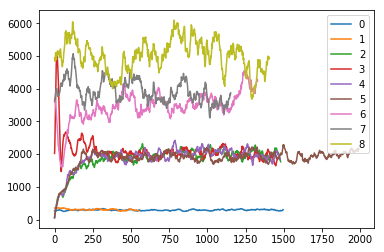

In [32]:
for i, trj in enumerate(trajectories):
    #for key in trj:
    print(i, list(zip(trj['atom_name'], trj['atom_num'])), len(trj['temp']))
    plt.plot(trj['temp'], label=i)

plt.legend()
plt.show()

0 [('W', 128)] 1496
1 [('W', 108)] 552
2 [('W', 127)] 1480
3 [('W', 129)] 1461
4 [('W', 129)] 1477
5 [('W', 135)] 1992
6 [('W', 128)] 1329
7 [('W', 113)] 1153
8 [('W', 113)] 1406


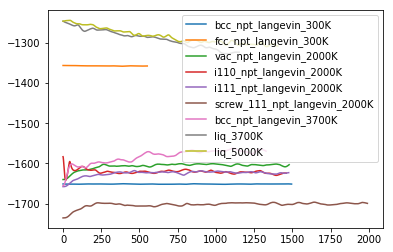

In [36]:
for i, trj in enumerate(trajectories):
    print(i, list(zip(trj['atom_name'], trj['atom_num'])), len(trj['energy']))
    plt.plot(trj['energy'], label=datasets[i])
plt.legend()
plt.show()

In [64]:
trajectories_0k[0].keys()

dict_keys(['box', 'xyz', 'atom_type', 'energy', 'forces', 'temp', 'free_energy', 'total_energy', 'atom_num', 'ensemble', 'box0', 'xyz0', 'atom_type0', 'atom_name', 'atom_num0'])

In [71]:
[(k, type(v)) for k, v in trajectories_0k[0].items()]

[autoreload of statmechlib.preprocessing.trajectory failed: Traceback (most recent call last):
  File "//anaconda/envs/py36/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "//anaconda/envs/py36/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "//anaconda/envs/py36/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "//anaconda/envs/py36/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 205, in _call_with_frames_removed
  File "../../

[('box', list),
 ('xyz', list),
 ('atom_type', list),
 ('energy', list),
 ('forces', list),
 ('temp', list),
 ('free_energy', list),
 ('total_energy', list),
 ('atom_num', list),
 ('ensemble', str),
 ('box0', numpy.ndarray),
 ('xyz0', numpy.ndarray),
 ('atom_type0', numpy.ndarray),
 ('atom_name', list),
 ('atom_num0', list)]

In [73]:
trajectories_0k[0]['atom_name']

['W']

In [ ]:
# Create a combined 'trajectory' of 0K configurations
trj_0k = dict.fromkeys(trajectories_0k[0])

# Append the last relaxation configurations and corresponding energies
for i, trj in enumerate(trajectories_0k):
    for key in trj:
        #print('Start:', i, key, len(trj[key]), end=' ')
        if 'atom_name' in key:
            continue
        if type(trj[key]) == list:
            trj[key][:] = trj[key][min_conf[i]:]

In [38]:
for i, trj in enumerate(trajectories_0k):
    print(i, list(zip(trj['atom_name'], trj['atom_num'])), len(trj['energy']))
    plt.scatter(trj['energy'][-1], label=datasets_0k[i])
plt.legend()
plt.show()

0 [('W', 128)] 5


TypeError: scatter() missing 1 required positional argument: 'y'

In [ ]:
for i, params_uopt in enumerate(optimal_parameters[7:8]):
    opti_out, targ_out = udif_print(params_uopt, stats, target, utot_EAM)
    plt.title('Selected configurations at 0K')
    if i == len(optimal_parameters)-1:
        plt.plot([o for o in opti_out[-1][:-1]], 'x--', label='optimized')
        plt.plot(targ_out[-1][:-1], 'o', label='target', markersize=10)
    else:
        plt.plot([o for o in opti_out[-1][:-1]], 'x--')
        plt.plot(targ_out[-1][:-1], 'o', label='target', markersize=10)

plt.xticks([0, 1, 2, 3], ['BCC','vacancy','110','111'])
plt.ylabel('Energy [eV]')
plt.legend()

In [216]:
# Process trajectories - cut out the equilibration periods
#min_conf = [100, 150, 100, 0] # starting indices
min_conf = [0, 0, 0, 0] # starting indices

In [217]:
# cycle over trajectories and eliminate equilibration configurations in all
for i, trj in enumerate(trajectories):
    for key in trj:
        #print('Start:', i, key, len(trj[key]), end=' ')
        if 'atom_num' in key or 'atom_name' in key:
            continue
        if type(trj[key]) == list:
            trj[key][:] = trj[key][min_conf[i]:]
            
        #print('End:', i, key, len(trj[key]))

0 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 619
1 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 426
2 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 432
3 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 458


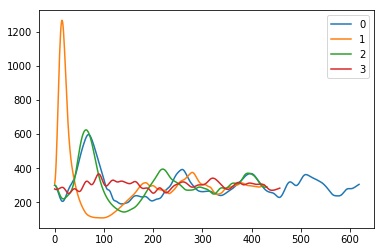

0 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 619
1 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 426
2 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 432
3 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 458


<function matplotlib.pyplot.legend(*args, **kwargs)>

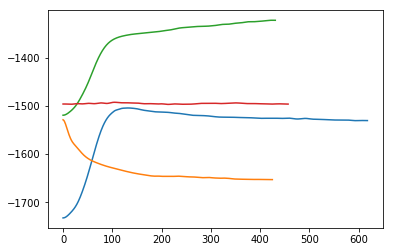

In [218]:
for i, trj in enumerate(trajectories):
    #for key in trj:
    print(i, list(zip(trj['atom_name'], trj['atom_num'])), len(trj['temp']))
    plt.plot(trj['temp'], label=i)

plt.legend()
plt.show()

for i, trj in enumerate(trajectories):
    #for key in trj:
    print(i, list(zip(trj['atom_name'], trj['atom_num'])), len(trj['energy']))
    plt.plot(trj['energy'], label=i)
plt.legend

In [219]:
trjs = []
for trj in trajectories:
    trj['ensemble'] = 'npt'
    trjs.append(Trajectory(trj, inplace=False))

In [220]:
trj_f = trjs[3]

In [221]:
#trj_f.append(trjs[2])

0 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 519
1 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 458


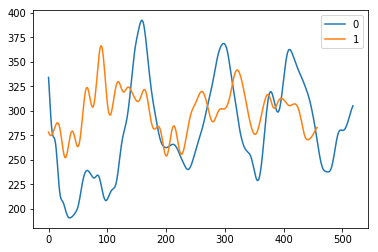

0 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 519
1 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 458


<function matplotlib.pyplot.legend(*args, **kwargs)>

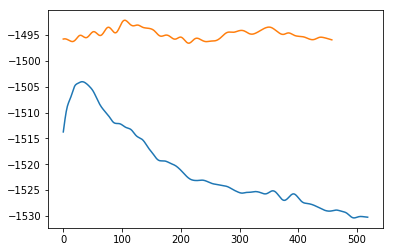

In [222]:
for i, trj in enumerate([trj_o, trj_f]):
    #for key in trj:
    print(i, list(zip(trj['atom_name'], trj['atom_num'])), len(trj['temp']))
    plt.plot(trj['temp'], label=i)

plt.legend()
plt.show()

for i, trj in enumerate([trj_o, trj_f]):
    #for key in trj:
    print(i, list(zip(trj['atom_name'], trj['atom_num'])), len(trj['energy']))
    plt.plot(trj['energy'], label=i)
plt.legend

In [223]:
#trj_o.to_xyz(os.path.join(target_raw, 'mx_o.xyz'))

In [228]:
trj_f.to_xyz(os.path.join(target_raw, 'mx_f.xyz'))
trjs[2].to_xyz(os.path.join(target_raw, 'mx_f0.xyz'))
trjs[0].to_xyz(os.path.join(target_raw, 'mx_o0.xyz'))

In [69]:
trj_f._trajectory.keys()

dict_keys(['box', 'xyz', 'atom_type', 'energy', 'forces', 'temp', 'free_energy', 'total_energy', 'atom_num', 'box0', 'xyz0', 'atom_type0', 'atom_name', 'ensemble'])

In [71]:
trj_f['box'][0]

array([[12.26800591,  0.        ,  0.        ],
       [-6.12871001, 10.63327471,  0.        ],
       [ 0.        ,  0.        , 22.39172064]])

In [72]:
trj_f_big = trj_f.replicate(vec_a=2, vec_b=2, vec_c=1)

atom_type 458 458


In [74]:
trj_f['box'][0], trj_f_big['box'][0]

(array([[12.26800591,  0.        ,  0.        ],
        [-6.12871001, 10.63327471,  0.        ],
        [ 0.        ,  0.        , 22.39172064]]),
 array([[ 24.53601182,   0.        ,   0.        ],
        [-12.25742002,  21.26654942,   0.        ],
        [  0.        ,   0.        ,  22.39172064]]))

In [75]:
trj_f_big.to_xyz(os.path.join(target_raw, 'mx_f_big.xyz'))

In [191]:
stats_big = [get_stats_Mie(xyz, box, atype, ms=[12, 6], rcut=8.0) for xyz, box, atype in zip(trj_f_big['xyz'][:2], trj_f_big['box'][:2], trj_f_big['atom_type'][:2])]

rcut: 8.0 (960, 960) (960, 960) (960, 960)
rcut: 8.0 (960, 960) (960, 960) (960, 960)


In [192]:
[s[0] for s in stats_big]

[{(0, 0): [0.03162699484710008, 0.6525214192650043],
  (0, 1): [0.10672188400541137, 1.6456098108578487],
  (0, 2): [0.08980721870694111, 8.130457894749211],
  (0, 3): [0.0008197648577815001, 0.6534306368314461],
  (0, 4): [1.0896124071947332e-06, 0.010061281492170431],
  (1, 1): [0.0003984254182350491, 0.305249168529528],
  (1, 2): [0.09797523164407955, 8.283863072227104],
  (1, 3): [0.0013876158843156756, 0.7949456979607498],
  (1, 4): [1.4066108079657566e-06, 0.010485025352389732],
  (2, 2): [0.003886293902995668, 2.977894095198382],
  (2, 3): [0.08397988232140166, 7.905704032368878],
  (2, 4): [3.551735270483283e-05, 0.06841585160076499],
  (3, 3): [0.007554726045737894, 2.556123720537764],
  (3, 4): [0.0803510575908502, 2.5779593104283736],
  (4, 4): [3.325807140913793e-08, 0.0005309305926080219]},
 {(0, 0): [0.031601778590005035, 0.6527506032628334],
  (0, 1): [0.10722600423540615, 1.647295504723056],
  (0, 2): [0.08997513233925168, 8.137276409146548],
  (0, 3): [0.00081864164366

In [187]:
stats = [get_stats_Mie(xyz, box, atype, ms=[12, 6], rcut=8.0) for xyz, box, atype in zip(trj_f['xyz'][:2], trj_f['box'][:2], trj_f['atom_type'][:2])]

Replicating: 2 2 1
rcut: 8.0 (240, 960) (240, 960) (240, 960)
Replicating: 2 2 1
rcut: 8.0 (240, 960) (240, 960) (240, 960)


In [188]:
[s[0] for s in stats]

[{(0, 0): [0.007906748711775052, 0.16313035481625124],
  (0, 1): [0.026680471001352783, 0.41140245271446196],
  (0, 2): [0.022451804676735285, 2.0326144736873033],
  (0, 3): [0.00020494121444537505, 0.16335765920786152],
  (0, 4): [2.724031017986833e-07, 0.002515320373042608],
  (1, 1): [9.960635455876223e-05, 0.07631229213238201],
  (1, 2): [0.024493807911019884, 2.0709657680567757],
  (1, 3): [0.0003469039710789188, 0.19873642449018736],
  (1, 4): [3.5165270199143894e-07, 0.0026212563380974326],
  (2, 2): [0.000971573475748917, 0.7444735237995957],
  (2, 3): [0.020994970580350405, 1.9764260080922191],
  (2, 4): [8.879338176208207e-06, 0.017103962900191248],
  (3, 3): [0.0018886815114344743, 0.639030930134441],
  (3, 4): [0.020087764397712562, 0.6444898276070936],
  (4, 4): [8.314517852284482e-09, 0.00013273264815200547]},
 {(0, 0): [0.007900444647501175, 0.1631876508157079],
  (0, 1): [0.026806501058851497, 0.4118238761807639],
  (0, 2): [0.022493783084812938, 2.034319102286638],
  (

In [204]:
stats[0][1][(0, 0)][-1][0]

array([-0.00022955, -0.00010835,  0.00035975])

In [208]:
stats_big[0][1][(0, 0)][-1][240]

array([-0.00022955, -0.00010835,  0.00035975])

1. Set charges based on Weiwei's charge info and past force fields
2. Take input parameters from the previous optimization
3. Create energy and force function for fitting (Start from EAM notebook)
4. Optimize

In [210]:
trj_o['box'][0], trj_f['box'][0]

(array([[12.06557696,  0.        ,  0.        ],
        [-6.05432642, 10.43313152,  0.        ],
        [ 0.        ,  0.        , 22.02162543]]),
 array([[12.26800591,  0.        ,  0.        ],
        [-6.12871001, 10.63327471,  0.        ],
        [ 0.        ,  0.        , 22.39172064]]))